In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os

In [2]:
df_spectral = pd.read_csv(r"E:\wenqu\numpy\aviris_spectral_combine.csv")
df_spectral

,file_name,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_10_21.tif,0.004095,0.008366,0.011143,0.012064,0.014178,0.016157,0.019465,0.019648,0.021816,...,0.032876,0.031840,0.031030,0.032435,0.039850,0.046477,0.122873,0.289441,0.113001,0.091605
1,site1b_10_24.tif,0.010162,0.017987,0.010830,0.017021,0.017567,0.016379,0.019352,0.020424,0.023193,...,0.026392,0.027079,0.032499,0.035687,0.030389,0.067178,0.088952,0.144447,0.125137,0.064748
2,site1b_10_25.tif,0.006902,0.009180,0.011334,0.013874,0.017388,0.015369,0.017985,0.020031,0.023258,...,0.036849,0.027824,0.032534,0.039909,0.032636,0.055107,0.040646,0.173911,0.154935,0.074669
3,site1b_10_26.tif,0.005427,0.008547,0.010773,0.014396,0.014228,0.014790,0.017349,0.020693,0.022823,...,0.031407,0.031854,0.035131,0.037115,0.037787,0.051414,0.072393,0.287284,0.121171,0.080450
4,site1b_10_27.tif,0.010331,0.012824,0.012874,0.013316,0.016856,0.018601,0.019378,0.022326,0.022935,...,0.030785,0.026421,0.027614,0.036539,0.034287,0.051169,0.111973,0.171473,0.108602,0.083328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,site6_8_50.tif,0.012503,0.014772,0.013833,0.018496,0.023779,0.023117,0.026650,0.028767,0.032528,...,0.043193,0.045819,0.048216,0.061910,0.044905,0.056159,0.137475,0.153593,0.187966,0.094426
3569,site6_9_46.tif,0.020958,0.028175,0.030020,0.027983,0.031116,0.034196,0.038520,0.039035,0.042405,...,0.051245,0.051572,0.051813,0.057562,0.056179,0.093329,0.155301,0.283692,0.180007,0.110812
3570,site6_9_47.tif,0.022712,0.006665,0.019463,0.022887,0.025820,0.022491,0.030423,0.033696,0.033015,...,0.051442,0.053151,0.045314,0.052819,0.055230,0.043774,0.181314,0.360806,0.173530,0.103716
3571,site6_9_48.tif,0.016615,0.020760,0.019618,0.030285,0.025423,0.025332,0.033006,0.035026,0.035339,...,0.046409,0.051305,0.047055,0.053254,0.056633,0.068974,0.301976,0.358733,0.087249,0.126770


In [3]:
file_name = df_spectral['file_name']
file_name

0       site1b_10_21.tif
1       site1b_10_24.tif
2       site1b_10_25.tif
3       site1b_10_26.tif
4       site1b_10_27.tif
              ...       
3568      site6_8_50.tif
3569      site6_9_46.tif
3570      site6_9_47.tif
3571      site6_9_48.tif
3572      site6_9_49.tif
Name: file_name, Length: 3573, dtype: object

## aviris bad bands removal

In [4]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [5]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [6]:
x_spectra.shape

(3573, 319)

In [7]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:300, :]
site2a_x = x_spectra[2410:2710, :]
site2c_x = x_spectra[2925:3225,:]
site6_x1 = x_spectra[3281:3393,:]
site6_x2 = x_spectra[3394:3574,:]
x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1, site6_x2))
# site2c_x = x[]
x.shape

(1191, 319)

In [8]:
d13c_trait_pdf_ymax = np.load('E:/wenqu/numpy/d13c_trait_pdf_ymax2.npy',  allow_pickle=True)
y1 = np.array(d13c_trait_pdf_ymax)

In [9]:
len(y1[:, 1])

3573

In [10]:
labels1 = [] 
for i in range(len(y1[:, 1])):
    substrings = y1[:, 1][i]
    site_name = substrings.split("_")[0]
    labels1.append(site_name)

In [11]:
len(labels1)

3573

In [12]:
site1b_labels1 = labels1[0:300]
site2a_labels1 = labels1[2410:2710]
site2c_labels1 = labels1[2925:3225]
site6_labels1_1 = labels1[3281:3393]
site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1 + site6_labels1_2
len(labels)

1191

# leave one out cross validation model

In [13]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))
    component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
#         break

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

    # Create plot of number of components vs. MSE
    fig, ax = plt.subplots()
    ax.plot(range(1, max_comp+1), mse[:, mseminy])
    ax.set_xlabel('Number of PLS components')
    ax.set_ylabel('MSE')
    ax.set_title('Number of PLS components vs. MSE')
    plt.show()
    
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y[:, 0].astype(np.float64))
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

# plot all sites

In [26]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# plot each single site

In [18]:
def simple_pls_cv(X, y, n_comp, color, M):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)   

 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c=color, marker=M, edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c=color, linewidth=1)
        ax.plot(y, y, color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

# d13c

In [15]:
d13c_trait_pdf_ymax = np.load('E:/wenqu/numpy/d13c_trait_pdf_ymax2.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load('E:/wenqu/numpy/d13c_trait_pdf_std2.npy',  allow_pickle=True)

In [16]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [17]:
y_d13c_max1.shape

(3573, 2)

In [18]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:300, :]
site2a_y_d13c_max1 = y_d13c_max1[2410:2710, :]
site2c_y_d13c_max1 = y_d13c_max1[2925:3225,:]
site6_y_d13c_max1_1 = y_d13c_max1[3281:3393,:]
site6_y_d13c_max1_2 = y_d13c_max1[3394:3574,:]
y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1, 
                       site6_y_d13c_max1_2))
# site2c_x = x[]
y_d13c_max.shape

(1191, 2)

In [19]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:300, :]
site2a_y_d13c_std1 = y_d13c_std1[2410:2710, :]
site2c_y_d13c_std1 = y_d13c_std1[2925:3225,:]
site6_y_d13c_std1_1 = y_d13c_std1[3281:3393,:]
site6_y_d13c_std1_2 = y_d13c_std1[3394:3574,:]
y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1, site6_y_d13c_std1_2))
# site2c_x = x[]
y_d13c_std.shape

(1191, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  264
Optimised MSEP  11.132112067388713



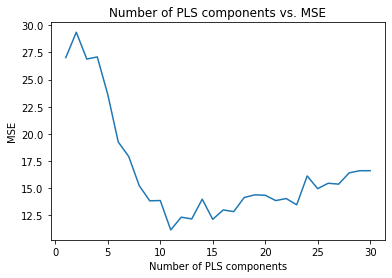

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [21]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 30)


In [89]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=11)
pls.fit(x, y_d13c_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:264]

# Extract the wavelengths to discard based on indices
wavelengths_to_discard = np.array(x)[discard_indices]

print("Wavelengths to discard:", wavelengths_to_discard)

Wavelengths to discard: [[0.03216314 0.03177413 0.03218869 ... 0.041916   0.04199027 0.04104232]
 [0.02913127 0.02869367 0.02846639 ... 0.0396103  0.03825204 0.03668341]
 [0.03113725 0.03356257 0.03394311 ... 0.05855647 0.05897861 0.05431304]
 ...
 [0.03070212 0.03173367 0.03305973 ... 0.06253086 0.05466429 0.05294131]
 [0.02664949 0.02768293 0.02845843 ... 0.04689146 0.04515505 0.04306728]
 [0.03156714 0.03131624 0.03302373 ... 0.06958175 0.06194105 0.06324967]]


In [90]:
# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{band}: {coef}")

band_16: -2.188153110837601
band_17: -2.5094048157895346
band_18: -0.8046010805096355
band_19: -1.3064667628322002
band_20: -0.3407066497532029
band_21: -1.938595718606988
band_32: 2.4948290455688147
band_34: 1.383198179935321
band_35: 1.6222448555788442
band_36: 1.1922536071835363
band_37: -0.3952684483118636
band_38: -1.4155126832750435
band_55: 0.37579630912659945
band_56: 0.7921993039780182
band_57: 0.4487336917958756
band_58: -1.3635464980196073
band_59: 3.325758922651016
band_60: 0.2623298307125436
band_61: 0.6432010175739424
band_62: -1.4518088856847842
band_63: -2.4015315633649594
band_65: -0.8245384514085964
band_66: -1.5045012478691693
band_67: -1.578128265953399
band_68: 0.4899952105190962
band_69: 1.463700585792702
band_70: 0.19662030189455812
band_71: 1.6761241853134297
band_72: 0.8267086556580318
band_73: 0.9349468968306248
band_74: 0.050570773968963145
band_75: -3.4125005712454892
band_76: -0.37120064840965356
band_77: 1.2563850340848775
band_78: -0.6050784944463172
band

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [22]:
x1_d13c_max = opt_Xc_d13c_max[0:300,:]
x2_d13c_max = opt_Xc_d13c_max[300:600,:]
x3_d13c_max = opt_Xc_d13c_max[600:900,:]
x4_d13c_max = opt_Xc_d13c_max[900:1191,:]

y1_d13c_max = y_d13c_max[0:300,:]
y2_d13c_max = y_d13c_max[300:600,:]
y3_d13c_max = y_d13c_max[600:900,:]
y4_d13c_max = y_d13c_max[900:1191,:]

R2 calib: 0.645
R2 CV: 0.440
MSE calib: 7.158
MSE CV: 11.300
[5.03708823] [0.4969899]
None
0 site1b [8.19600248] [6.680403438494835 'site1b_d13c_site1b_10_21.tif']
1 site1b [7.25307382] [9.659498027796731 'site1b_d13c_site1b_10_24.tif']
2 site1b [9.7069585] [8.600336221097034 'site1b_d13c_site1b_10_25.tif']
3 site1b [9.06272968] [9.270818430466548 'site1b_d13c_site1b_10_26.tif']
4 site1b [8.35654595] [9.140277600549211 'site1b_d13c_site1b_10_27.tif']
5 site1b [9.03646805] [7.878233782613312 'site1b_d13c_site1b_10_28.tif']
6 site1b [5.59536263] [5.9228543863739755 'site1b_d13c_site1b_10_29.tif']
7 site1b [6.05640693] [6.150607247579823 'site1b_d13c_site1b_10_30.tif']
8 site1b [8.32443579] [8.637650554031975 'site1b_d13c_site1b_10_31.tif']
9 site1b [11.89818596] [9.386411464550118 'site1b_d13c_site1b_10_35.tif']
10 site1b [10.64482688] [8.767852049685509 'site1b_d13c_site1b_10_36.tif']
11 site1b [8.79652904] [7.74684689179278 'site1b_d13c_site1b_11_27.tif']
12 site1b [7.79121042] [5.7389

486 site2a [8.61969989] [6.582995478335503 'site2a_d13c_site2a_19_8.tif']
487 site2a [9.36227857] [6.065362156194611 'site2a_d13c_site2a_19_9.tif']
488 site2a [10.37504091] [6.415394951192298 'site2a_d13c_site2a_20_10.tif']
489 site2a [10.37504091] [5.612820410903656 'site2a_d13c_site2a_20_11.tif']
490 site2a [10.37295683] [5.7361075305414815 'site2a_d13c_site2a_20_12.tif']
491 site2a [9.83805855] [5.999275515759625 'site2a_d13c_site2a_20_13.tif']
492 site2a [9.67438691] [5.712993245472412 'site2a_d13c_site2a_20_14.tif']
493 site2a [10.41333847] [6.027405682087184 'site2a_d13c_site2a_20_15.tif']
494 site2a [8.59872038] [6.290957960710871 'site2a_d13c_site2a_20_16.tif']
495 site2a [9.96898904] [6.623923694797389 'site2a_d13c_site2a_20_17.tif']
496 site2a [7.76246907] [5.942406867921602 'site2a_d13c_site2a_20_18.tif']
497 site2a [8.09700206] [6.198859603696966 'site2a_d13c_site2a_20_19.tif']
498 site2a [9.03977253] [5.538896009356671 'site2a_d13c_site2a_20_20.tif']
499 site2a [9.09486231

860 site2c [15.24589362] [17.517747641977163 'site2c_d13c_site2c_30_29.tif']
861 site2c [14.23908617] [14.345037110467212 'site2c_d13c_site2c_30_30.tif']
862 site2c [16.83168314] [16.397770669142716 'site2c_d13c_site2c_31_18.tif']
863 site2c [16.64337779] [19.55133366209012 'site2c_d13c_site2c_31_19.tif']
864 site2c [13.07223941] [14.817002406533986 'site2c_d13c_site2c_31_20.tif']
865 site2c [14.39424985] [18.500077079304468 'site2c_d13c_site2c_31_21.tif']
866 site2c [17.27539102] [18.393326349222587 'site2c_d13c_site2c_31_22.tif']
867 site2c [18.11812075] [16.30170321657513 'site2c_d13c_site2c_31_23.tif']
868 site2c [19.97644457] [17.6388712462282 'site2c_d13c_site2c_31_24.tif']
869 site2c [14.82727315] [16.03671935976661 'site2c_d13c_site2c_31_25.tif']
870 site2c [15.0225097] [16.371985792797336 'site2c_d13c_site2c_31_26.tif']
871 site2c [17.0343985] [14.951967422901605 'site2c_d13c_site2c_31_27.tif']
872 site2c [17.7828956] [13.416365897943043 'site2c_d13c_site2c_31_28.tif']
873 sit

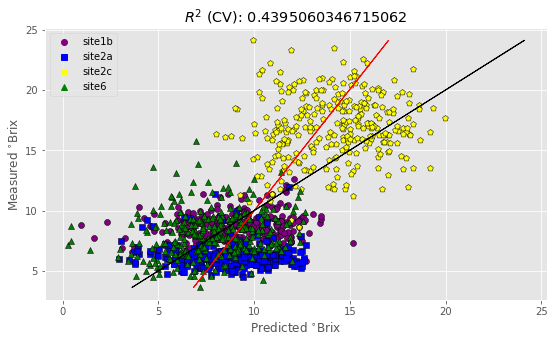

In [27]:
file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

## d13c std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  220
Optimised MSEP  0.0016226331396462983



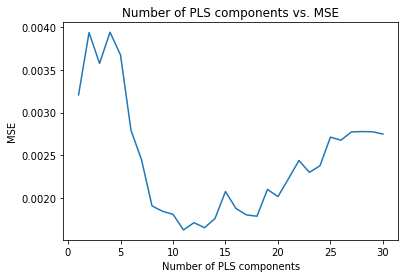

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [28]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 30)
# simple_pls_cv_label_category(opt_Xc_d13c_std, y_d13c_std, ncomp_d13c_std, labels)

# get selected bands and corresponding coefficients

In [91]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=11)
pls.fit(x, y_d13c_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:220]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")
#     print(f"{band}: {coef}")

0.04072596686822171: band_16
0.033158152843432216: band_17
0.009605031808804317: band_18
0.013903372935128002: band_19
0.006039373583145315: band_20
0.017382548354237463: band_21
-0.005823749338369135: band_22
-0.016543499660168152: band_23
-0.033726130805877774: band_24
-0.018173487436246662: band_25
-0.024889450196108276: band_26
0.0037766844470388736: band_27
0.03177611245261625: band_28
-0.028383581870833566: band_29
-0.02692754092014647: band_30
-0.022967046297265443: band_31
-0.036106243120844546: band_32
-0.01128197927676405: band_33
-0.019846927638281837: band_34
-0.017633581179067676: band_35
-0.0016604302489416326: band_36
0.019415312320475855: band_37
0.017755568072435033: band_38
0.0028491289140057607: band_39
-0.006569716015655556: band_40
0.024685702126916266: band_41
0.010280686777384744: band_42
-0.009692779282552345: band_43
-0.011805679583280992: band_44
-0.01906574023235998: band_45
-0.0050047329070108115: band_46
-0.010253514050628703: band_47
-0.008642699503904405:

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [29]:
x1_d13c_std = opt_Xc_d13c_std[0:300,:]
x2_d13c_std = opt_Xc_d13c_std[300:600,:]
x3_d13c_std = opt_Xc_d13c_std[600:900,:]
x4_d13c_std = opt_Xc_d13c_std[900:1191,:]

y1_d13c_std = y_d13c_std[0:300,:]
y2_d13c_std = y_d13c_std[300:600,:]
y3_d13c_std = y_d13c_std[600:900,:]
y4_d13c_std = y_d13c_std[900:1191,:]

R2 calib: 0.739
R2 CV: 0.550
MSE calib: 0.001
MSE CV: 0.002
[0.05729449] [0.56708349]
None
0 site1b [0.15108864] [0.21551160407389117 'site1b_d13c_site1b_10_21.tif']
1 site1b [0.16093624] [0.142954442273209 'site1b_d13c_site1b_10_24.tif']
2 site1b [0.11037261] [0.15608749790485688 'site1b_d13c_site1b_10_25.tif']
3 site1b [0.1356669] [0.1442136328974763 'site1b_d13c_site1b_10_26.tif']
4 site1b [0.1300604] [0.14834177110920047 'site1b_d13c_site1b_10_27.tif']
5 site1b [0.12171477] [0.17250050508591339 'site1b_d13c_site1b_10_28.tif']
6 site1b [0.17465432] [0.2267803796793347 'site1b_d13c_site1b_10_29.tif']
7 site1b [0.18123167] [0.21816130726294297 'site1b_d13c_site1b_10_30.tif']
8 site1b [0.14136358] [0.16270047373436902 'site1b_d13c_site1b_10_31.tif']
9 site1b [0.11714938] [0.1434911832453569 'site1b_d13c_site1b_10_35.tif']
10 site1b [0.1117895] [0.15194584621041826 'site1b_d13c_site1b_10_36.tif']
11 site1b [0.15011051] [0.17339213899746608 'site1b_d13c_site1b_11_27.tif']
12 site1b [0.16

468 site2a [0.13846941] [0.21288425559506555 'site2a_d13c_site2a_19_14.tif']
469 site2a [0.15575533] [0.20324299367473636 'site2a_d13c_site2a_19_15.tif']
470 site2a [0.14643062] [0.1947491750708977 'site2a_d13c_site2a_19_16.tif']
471 site2a [0.17091691] [0.20062537596700358 'site2a_d13c_site2a_19_17.tif']
472 site2a [0.15195643] [0.2182705071837889 'site2a_d13c_site2a_19_18.tif']
473 site2a [0.18161838] [0.20842818273661284 'site2a_d13c_site2a_19_19.tif']
474 site2a [0.15896993] [0.19987402202926996 'site2a_d13c_site2a_19_20.tif']
475 site2a [0.17364859] [0.22338970091130445 'site2a_d13c_site2a_19_21.tif']
476 site2a [0.18088347] [0.2180911098534839 'site2a_d13c_site2a_19_22.tif']
477 site2a [0.19781455] [0.25749219618082547 'site2a_d13c_site2a_19_23.tif']
478 site2a [0.20027534] [0.2572600289111128 'site2a_d13c_site2a_19_24.tif']
479 site2a [0.21923136] [0.24997172601035028 'site2a_d13c_site2a_19_25.tif']
480 site2a [0.20395879] [0.24077760584761654 'site2a_d13c_site2a_19_26.tif']
481

1041 site6 [0.10181242] [0.06912935643210981 'site6_d13c_site6_41_19.tif']
1042 site6 [0.0921045] [0.06951442283663398 'site6_d13c_site6_41_20.tif']
1043 site6 [0.09580462] [0.07393091133294434 'site6_d13c_site6_41_21.tif']
1044 site6 [0.04722961] [0.07919841173175458 'site6_d13c_site6_41_22.tif']
1045 site6 [0.05849308] [0.08141827978887313 'site6_d13c_site6_41_23.tif']
1046 site6 [0.06910594] [0.07856161025121687 'site6_d13c_site6_41_24.tif']
1047 site6 [0.03939792] [0.07115128115238088 'site6_d13c_site6_41_25.tif']
1048 site6 [0.0928506] [0.07757015642388991 'site6_d13c_site6_42_18.tif']
1049 site6 [0.08928001] [0.06605430633314935 'site6_d13c_site6_42_19.tif']
1050 site6 [0.05714568] [0.05979779300511048 'site6_d13c_site6_42_20.tif']
1051 site6 [0.07446522] [0.07042337328331745 'site6_d13c_site6_42_21.tif']
1052 site6 [0.0376856] [0.09418228244650198 'site6_d13c_site6_42_22.tif']
1053 site6 [0.05961638] [0.07658231528453449 'site6_d13c_site6_42_23.tif']
1054 site6 [0.06879456] [0.0

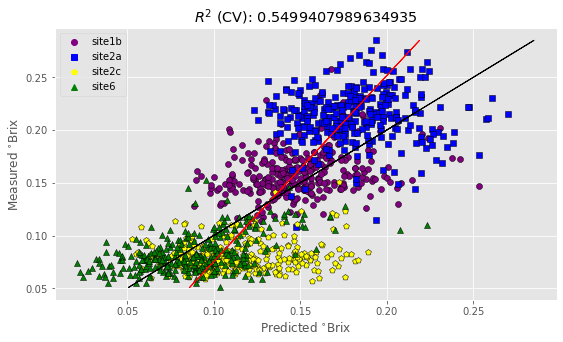

In [30]:
file_name_d13c_std = 'E:/wenqu/model_csv_point/d13c_std.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

# d15n

In [31]:
d15n_trait_pdf_ymax = np.load('E:/wenqu/numpy/d15n_trait_pdf_ymax2.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load('E:/wenqu/numpy/d15n_trait_pdf_std2.npy',  allow_pickle=True)

In [32]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [33]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:300, :]
site2a_y_d15n_max1 = y_d15n_max1[2410:2710, :]
site2c_y_d15n_max1 = y_d15n_max1[2925:3225,:]
site6_y_d15n_max1_1 = y_d15n_max1[3281:3393,:]
site6_y_d15n_max1_2 = y_d15n_max1[3394:3574,:]
y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1, site6_y_d15n_max1_2))
# site2c_x = x[]
y_d15n_max.shape

(1191, 2)

In [34]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:300, :]
site2a_y_d15n_std1 = y_d15n_std1[2410:2710, :]
site2c_y_d15n_std1 = y_d15n_std1[2925:3225,:]
site6_y_d15n_std1_1 = y_d15n_std1[3281:3393,:]
site6_y_d15n_std1_2 = y_d15n_std1[3394:3574,:]
y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1,site6_y_d15n_std1_2))
# site2c_x = x[]
y_d15n_std.shape

(1191, 2)

#### d15n y_max all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  265
Optimised MSEP  2.6447447165136



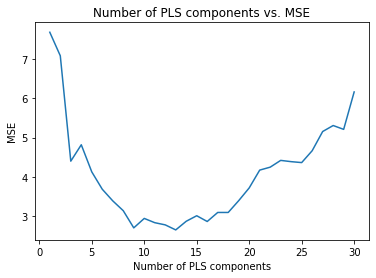

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [35]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 30)
x1_d15n_max = opt_Xc_d15n_max[0:300,:]
x2_d15n_max = opt_Xc_d15n_max[300:600,:]
x3_d15n_max = opt_Xc_d15n_max[600:900,:]
x4_d15n_max = opt_Xc_d15n_max[900:1191,:]

y1_d15n_max = y_d15n_max[0:300,:]
y2_d15n_max = y_d15n_max[300:600,:]
y3_d15n_max = y_d15n_max[600:900,:]
y4_d15n_max = y_d15n_max[900:1191,:]



In [92]:
pls = PLSRegression(n_components=13)
pls.fit(x, y_d15n_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:265]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

1.0759908978818018: band_16
2.3206127827955285: band_17
0.043904439042541654: band_18
-0.16607700426718633: band_19
-0.7516325235786087: band_20
0.06065767288764187: band_22
-0.6215476675270667: band_31
-1.6937112915930725: band_32
-1.5976650354069188: band_33
-0.29157305973491254: band_34
1.3786254390596147: band_35
0.2657185719205508: band_36
1.5540530280360447: band_37
0.140587814420756: band_38
0.6940206410421617: band_39
0.7518329071095715: band_40
1.8539435917733664: band_41
-0.026403851872591547: band_59
-1.032619151589267: band_60
1.57188972875392: band_61
1.0169512931483646: band_62
1.4688140746558862: band_63
0.10285041936488534: band_65
-0.4009830725992239: band_66
-0.15553202443119893: band_67
1.092132635991622: band_68
1.263802962899766: band_69
-1.255081252392888: band_70
0.6661805209389321: band_71
-1.7695851235002902: band_72
2.0404329443273936: band_77
1.2720204079366002: band_78
1.7547815619786835: band_79
1.5436518773600132: band_80
0.03866073156695166: band_82
-0.34

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.742
R2 CV: 0.685
MSE calib: 1.985
MSE CV: 2.424
[2.0024561] [0.71049955]
None
0 site1b [9.94678066] [6.185706818397607 'site1b_d15n_site1b_10_21.tif']
1 site1b [11.59688486] [10.6358086114019 'site1b_d15n_site1b_10_24.tif']
2 site1b [12.04891647] [12.297406205919732 'site1b_d15n_site1b_10_25.tif']
3 site1b [12.11089159] [10.781504220483933 'site1b_d15n_site1b_10_26.tif']
4 site1b [10.14019197] [12.088442707595734 'site1b_d15n_site1b_10_27.tif']
5 site1b [10.85816446] [8.413662622601718 'site1b_d15n_site1b_10_28.tif']
6 site1b [10.0544099] [7.205552841164075 'site1b_d15n_site1b_10_29.tif']
7 site1b [9.11658329] [6.54012859432018 'site1b_d15n_site1b_10_30.tif']
8 site1b [9.67586535] [7.7673928063494575 'site1b_d15n_site1b_10_31.tif']
9 site1b [14.30257338] [13.227255265168367 'site1b_d15n_site1b_10_35.tif']
10 site1b [12.79360007] [12.247791320452967 'site1b_d15n_site1b_10_36.tif']
11 site1b [11.79206203] [8.865160414610115 'site1b_d15n_site1b_11_27.tif']
12 site1b [10.113717

472 site2a [6.5169736] [5.675031083868383 'site2a_d15n_site2a_19_18.tif']
473 site2a [6.85862738] [5.870567532943063 'site2a_d15n_site2a_19_19.tif']
474 site2a [6.23203554] [6.582473877708857 'site2a_d15n_site2a_19_20.tif']
475 site2a [6.39295126] [6.593672379128796 'site2a_d15n_site2a_19_21.tif']
476 site2a [6.29080372] [6.45756263430349 'site2a_d15n_site2a_19_22.tif']
477 site2a [6.56439008] [5.127199715491177 'site2a_d15n_site2a_19_23.tif']
478 site2a [5.6101671] [5.841345335931735 'site2a_d15n_site2a_19_24.tif']
479 site2a [6.01566753] [5.96677983343928 'site2a_d15n_site2a_19_25.tif']
480 site2a [6.6506273] [6.083453897396891 'site2a_d15n_site2a_19_26.tif']
481 site2a [7.03115162] [7.060373426043622 'site2a_d15n_site2a_19_27.tif']
482 site2a [6.60227303] [9.68577266764879 'site2a_d15n_site2a_19_28.tif']
483 site2a [7.95882251] [6.515583256875932 'site2a_d15n_site2a_19_30.tif']
484 site2a [6.21266209] [6.67950356487649 'site2a_d15n_site2a_19_31.tif']
485 site2a [7.11335688] [7.87238

1031 site6 [4.89880515] [7.314068335857721 'site6_d15n_site6_39_24.tif']
1032 site6 [3.69015987] [3.4418455817895786 'site6_d15n_site6_3_52.tif']
1033 site6 [4.89060121] [3.428815331611884 'site6_d15n_site6_3_53.tif']
1034 site6 [5.25301606] [3.667967956596835 'site6_d15n_site6_3_54.tif']
1035 site6 [4.37537558] [4.378893675489175 'site6_d15n_site6_3_55.tif']
1036 site6 [6.84373735] [4.611761173013946 'site6_d15n_site6_40_20.tif']
1037 site6 [6.54360361] [6.72889832553444 'site6_d15n_site6_40_21.tif']
1038 site6 [7.02083518] [7.47037108394274 'site6_d15n_site6_40_22.tif']
1039 site6 [6.52134885] [7.863406522566877 'site6_d15n_site6_40_23.tif']
1040 site6 [6.71505855] [3.9400568984003885 'site6_d15n_site6_40_24.tif']
1041 site6 [4.4730518] [5.7309695105373075 'site6_d15n_site6_41_19.tif']
1042 site6 [3.26586846] [4.642387545353021 'site6_d15n_site6_41_20.tif']
1043 site6 [4.69764048] [6.45872056032503 'site6_d15n_site6_41_21.tif']
1044 site6 [4.50577048] [5.605973774955993 'site6_d15n_s

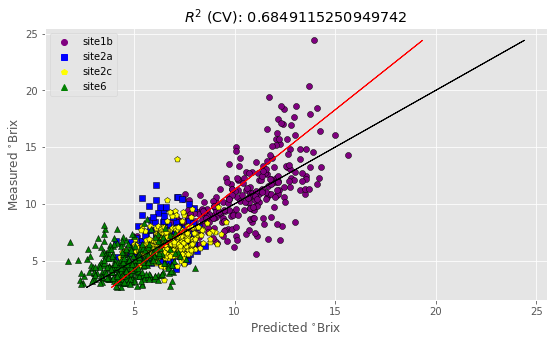

In [36]:
file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

#### d15n y_std all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  225
Optimised MSEP  0.0009326223219227285



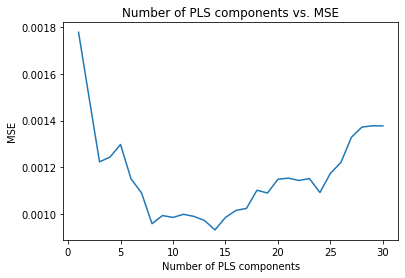

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.733
R2 CV: 0.637
MSE calib: 0.001
MSE CV: 0.001
[0.06460986] [0.65661693]
None
0 site1b [0.17267207] [0.2378388517323535 'site1b_d15n_site1b_10_21.tif']
1 site1b [0.15995173] [0.1452861340431743 'site1b_d15n_site1b_10_24.tif']
2 site1b [0.14648838] [0.12270955022099123 'site1b_d15n_site1b_10_25.tif']
3 site1b [0.15173094] [0.14430999907672387 'site1b_d15n_site1b_10_26.tif']
4 site1b [0.17130796] [0.12774090120297252 'site1b_d15n_site1b_10_27.tif']
5 site1b [0.1571749] [0.18905785438810294 'site1b_d15n_site1b_10_28.tif']
6 site1b [0.18834649] [0.20407066477809463 'site1b_d15n_site1b_10_29.tif']
7 site1b [0.17892116] [0.2112757533823793 'site1b_d15n_site1b_10_30.tif']
8 site1b [0.15708713] [0.18630435258094843 'site1b_d15n_site1b_10_31.tif']
9 site1b [0.09773845] [0.11807444864423439 'site1b_d15n_site1b_10_35.tif']
10 site1b [0.11674335] [0.12101374434571494 'site1b_d15n_site1b_10_36.tif']
11 site1b [0.14991466] [0.17228621844464864 'site1b_d15n_site1b_11_27.tif']
12 site1b [

489 site2a [0.21823293] [0.20690507501142344 'site2a_d15n_site2a_20_11.tif']
490 site2a [0.21491095] [0.19267185082471916 'site2a_d15n_site2a_20_12.tif']
491 site2a [0.21097648] [0.17481257272595085 'site2a_d15n_site2a_20_13.tif']
492 site2a [0.19663747] [0.18725060970978674 'site2a_d15n_site2a_20_14.tif']
493 site2a [0.20783118] [0.1930797857145619 'site2a_d15n_site2a_20_15.tif']
494 site2a [0.21313434] [0.18032117146711124 'site2a_d15n_site2a_20_16.tif']
495 site2a [0.22412711] [0.19328168739212412 'site2a_d15n_site2a_20_17.tif']
496 site2a [0.23369292] [0.22125579083734573 'site2a_d15n_site2a_20_18.tif']
497 site2a [0.24593601] [0.22421768494954647 'site2a_d15n_site2a_20_19.tif']
498 site2a [0.23989282] [0.25627973043233343 'site2a_d15n_site2a_20_20.tif']
499 site2a [0.23182899] [0.24440015081443353 'site2a_d15n_site2a_20_21.tif']
500 site2a [0.22258951] [0.2392119154113683 'site2a_d15n_site2a_20_22.tif']
501 site2a [0.22680612] [0.258559896999471 'site2a_d15n_site2a_20_23.tif']
502

1054 site6 [0.15374271] [0.18256645388354786 'site6_d15n_site6_42_24.tif']
1055 site6 [0.15284387] [0.1439180152822892 'site6_d15n_site6_42_25.tif']
1056 site6 [0.15042975] [0.12021503752357823 'site6_d15n_site6_43_16.tif']
1057 site6 [0.14862899] [0.11022829713082741 'site6_d15n_site6_43_17.tif']
1058 site6 [0.13692046] [0.11589812528707918 'site6_d15n_site6_43_18.tif']
1059 site6 [0.14738645] [0.0981728137355324 'site6_d15n_site6_43_19.tif']
1060 site6 [0.15244616] [0.09217722024504875 'site6_d15n_site6_43_20.tif']
1061 site6 [0.14778004] [0.10921059674070804 'site6_d15n_site6_43_21.tif']
1062 site6 [0.15402767] [0.14540969878859664 'site6_d15n_site6_43_22.tif']
1063 site6 [0.14843283] [0.17620430253854147 'site6_d15n_site6_43_23.tif']
1064 site6 [0.13572474] [0.16002088084976243 'site6_d15n_site6_43_24.tif']
1065 site6 [0.17072142] [0.1597630328387585 'site6_d15n_site6_44_16.tif']
1066 site6 [0.15374815] [0.10906236622025664 'site6_d15n_site6_44_17.tif']
1067 site6 [0.14221489] [0.0

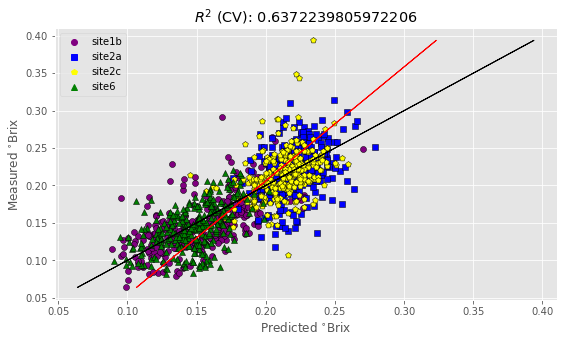

In [37]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 30)

x1_d15n_std = opt_Xc_d15n_std[0:300,:]
x2_d15n_std = opt_Xc_d15n_std[300:600,:]
x3_d15n_std = opt_Xc_d15n_std[600:900,:]
x4_d15n_std = opt_Xc_d15n_std[900:1191,:]

y1_d15n_std = y_d15n_std[0:300,:]
y2_d15n_std = y_d15n_std[300:600,:]
y3_d15n_std = y_d15n_std[600:900,:]
y4_d15n_std = y_d15n_std[900:1191,:]


file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

In [93]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=14)
pls.fit(x, y_d15n_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:225]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

-0.012874410972706155: band_16
-0.015121247993317143: band_17
0.0015261282672438892: band_19
0.02198359207693466: band_20
0.006233615423049139: band_21
-0.008854829713046063: band_22
0.014117343865741094: band_25
0.029798257507748633: band_32
0.012721311712871643: band_33
-0.032602018838738575: band_34
-0.06253927999050814: band_35
-0.004008346093140795: band_36
-0.019946905876622418: band_37
0.015002709360583835: band_38
0.0011558796991799458: band_39
-0.0026204537708810166: band_40
-0.03723905436372568: band_41
0.015713654591599274: band_55
0.01768460052346496: band_56
0.0061649983195338825: band_57
-0.027031158833880648: band_58
-0.027210777441917248: band_59
0.009539405958290038: band_60
-0.03407960743036575: band_61
-0.017955158504135833: band_62
-0.021276271830336167: band_63
-0.0065331231343401484: band_64
0.007306035871256356: band_65
0.027135764916235598: band_66
0.001155047959201279: band_67
-0.02320273901339996: band_68
-0.008126610307983192: band_69
0.03400965251968854: ban

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# la

In [38]:
la_trait_pdf_ymax = np.load('E:/wenqu/numpy/la_trait_pdf_ymax2.npy',  allow_pickle=True)
la_trait_pdf_std = np.load('E:/wenqu/numpy/la_trait_pdf_std2.npy',  allow_pickle=True)

In [39]:

y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [40]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:300, :]
site2a_y_la_max1 = y_la_max1[2410:2710, :]
site2c_y_la_max1 = y_la_max1[2925:3225,:]
site6_y_la_max1_1 = y_la_max1[3281:3393,:]
site6_y_la_max1_2 = y_la_max1[3394:3574,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1, site6_y_la_max1_2))
# site2c_x = x[]
y_la_max.shape

(1191, 2)

In [41]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:300, :]
site2a_y_la_std1 = y_la_std1[2410:2710, :]
site2c_y_la_std1 = y_la_std1[2925:3225,:]
site6_y_la_std1_1 = y_la_std1[3281:3393,:]
site6_y_la_std1_2 = y_la_std1[3394:3574,:]
y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1, site6_y_la_std1_2))
# site2c_x = x[]
y_la_std.shape

(1191, 2)

#### LA max all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  235
Optimised MSEP  50.400881631191844



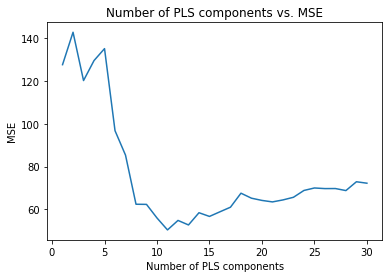

R2 calib: 0.735
R2 CV: 0.504
MSE calib: 27.213
MSE CV: 50.967


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[7.93283852] [0.54892376]
None
0 site1b [8.1891758] [7.324553816277909 'site1b_la_site1b_10_21.tif']
1 site1b [5.41690082] [11.830876684009086 'site1b_la_site1b_10_24.tif']
2 site1b [12.87056625] [10.975914458608152 'site1b_la_site1b_10_25.tif']
3 site1b [10.34967555] [10.14830072875552 'site1b_la_site1b_10_26.tif']
4 site1b [10.94044702] [10.817437538278291 'site1b_la_site1b_10_27.tif']
5 site1b [11.13838695] [8.04725968840291 'site1b_la_site1b_10_28.tif']
6 site1b [4.46321564] [6.693972322694597 'site1b_la_site1b_10_29.tif']
7 site1b [3.31705863] [6.65535113502716 'site1b_la_site1b_10_30.tif']
8 site1b [9.81035696] [8.551471268475844 'site1b_la_site1b_10_31.tif']
9 site1b [19.33608233] [10.909048664015927 'site1b_la_site1b_10_35.tif']
10 site1b [19.69092099] [10.84095446670551 'site1b_la_site1b_10_36.tif']
11 site1b [7.5774949] [8.422195327628735 'site1b_la_site1b_11_27.tif']
12 site1b [4.05800189] [6.712081754496327 'site1b_la_site1b_11_28.tif']
13 site1b [16.68206179] [7.5444553221

469 site2a [19.13089727] [7.191800036386764 'site2a_la_site2a_19_15.tif']
470 site2a [19.5345463] [7.2939976267020095 'site2a_la_site2a_19_16.tif']
471 site2a [14.93220019] [6.965736795632821 'site2a_la_site2a_19_17.tif']
472 site2a [16.17388476] [6.314116507325808 'site2a_la_site2a_19_18.tif']
473 site2a [14.9698975] [6.644069159890492 'site2a_la_site2a_19_19.tif']
474 site2a [16.59844041] [7.158651209415476 'site2a_la_site2a_19_20.tif']
475 site2a [13.51306797] [6.351806506664929 'site2a_la_site2a_19_21.tif']
476 site2a [12.97671007] [6.593296170349393 'site2a_la_site2a_19_22.tif']
477 site2a [10.67982006] [5.715692082434487 'site2a_la_site2a_19_23.tif']
478 site2a [9.58737214] [5.942694698941785 'site2a_la_site2a_19_24.tif']
479 site2a [7.89329777] [6.009313579884715 'site2a_la_site2a_19_25.tif']
480 site2a [9.64387405] [6.1799690931779425 'site2a_la_site2a_19_26.tif']
481 site2a [9.39827949] [6.982767692536604 'site2a_la_site2a_19_27.tif']
482 site2a [14.47755017] [7.47338924838284

1036 site6 [20.89936312] [20.527434421311685 'site6_la_site6_40_20.tif']
1037 site6 [21.4689521] [32.89642936348576 'site6_la_site6_40_21.tif']
1038 site6 [23.97617818] [30.90974307038595 'site6_la_site6_40_22.tif']
1039 site6 [25.97781459] [28.2809087107614 'site6_la_site6_40_23.tif']
1040 site6 [28.52337505] [21.024473016980778 'site6_la_site6_40_24.tif']
1041 site6 [23.90080149] [24.162627360042634 'site6_la_site6_41_19.tif']
1042 site6 [21.90701025] [20.842150700993606 'site6_la_site6_41_20.tif']
1043 site6 [22.51058303] [23.57793681776568 'site6_la_site6_41_21.tif']
1044 site6 [31.05522399] [27.09512451329352 'site6_la_site6_41_22.tif']
1045 site6 [28.16609291] [26.77397350658603 'site6_la_site6_41_23.tif']
1046 site6 [25.40846069] [20.10196618579782 'site6_la_site6_41_24.tif']
1047 site6 [31.64694139] [20.27062656518736 'site6_la_site6_41_25.tif']
1048 site6 [26.69820341] [26.188182404347415 'site6_la_site6_42_18.tif']
1049 site6 [29.90695444] [24.815278971597277 'site6_la_site6_

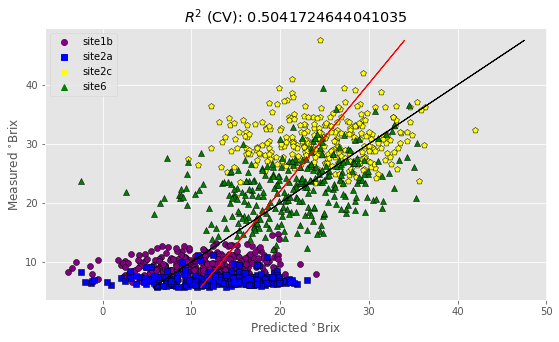

In [42]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 30)
x1_la_max = opt_Xc_la_max[0:300,:]
x2_la_max = opt_Xc_la_max[300:600,:]
x3_la_max = opt_Xc_la_max[600:900,:]
x4_la_max = opt_Xc_la_max[900:1191,:]

y1_la_max = y_la_max[0:300,:]
y2_la_max = y_la_max[300:600,:]
y3_la_max = y_la_max[600:900,:]
y4_la_max = y_la_max[900:1191,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

In [94]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=11)
pls.fit(x, y_la_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:235]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

-4.175450864431526: band_16
-6.519996408709504: band_17
-2.3571533523145765: band_18
-3.2471015002216914: band_19
0.3001388821127035: band_20
-3.695752681018515: band_21
0.9004275608425869: band_22
2.211062934126264: band_23
2.7090299032116185: band_24
3.389663754173591: band_25
-5.051276936391275: band_28
5.498920892970417: band_32
2.680415246651753: band_33
3.5067905977749385: band_34
2.224320397624645: band_35
1.6398412427343165: band_36
-2.612391481190357: band_37
-4.214260942355459: band_38
-3.3307426716997224: band_39
-1.2264727529161268: band_40
-2.220546710761183: band_41
-2.784678330966498: band_42
1.828336611660933: band_43
2.512015425661146: band_44
2.3075983555108626: band_45
0.06532334587000768: band_46
0.12445395666571289: band_47
0.3001232553273342: band_48
0.18618880375826993: band_49
1.1190142176233857: band_50
0.2880098870292304: band_51
0.6635803260412685: band_52
-3.8292466528586724: band_53
-0.38908564421180214: band_54
0.8702490557401138: band_55
2.126207306991986

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


#### LA std all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  251
Optimised MSEP  0.0018394342730115704



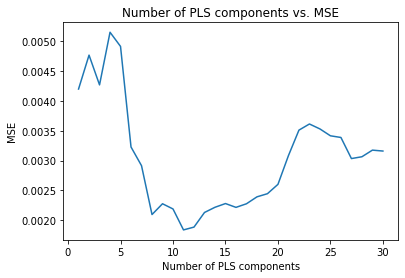

R2 calib: 0.786
R2 CV: 0.599
MSE calib: 0.001
MSE CV: 0.002


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[0.03669375] [0.6273336]
None
0 site1b [0.14266317] [0.18980145524768152 'site1b_la_site1b_10_21.tif']
1 site1b [0.13571024] [0.12074626086740498 'site1b_la_site1b_10_24.tif']
2 site1b [0.09918898] [0.12229974237833917 'site1b_la_site1b_10_25.tif']
3 site1b [0.1134378] [0.13172588831984294 'site1b_la_site1b_10_26.tif']
4 site1b [0.09824272] [0.12432543986420395 'site1b_la_site1b_10_27.tif']
5 site1b [0.10712938] [0.16785006721348117 'site1b_la_site1b_10_28.tif']
6 site1b [0.15963118] [0.2002387520760585 'site1b_la_site1b_10_29.tif']
7 site1b [0.15233408] [0.20144354027017947 'site1b_la_site1b_10_30.tif']
8 site1b [0.11994338] [0.16029565874722193 'site1b_la_site1b_10_31.tif']
9 site1b [0.09870877] [0.12179925493865705 'site1b_la_site1b_10_35.tif']
10 site1b [0.09446168] [0.12236309650920883 'site1b_la_site1b_10_36.tif']
11 site1b [0.14111905] [0.15967465649395898 'site1b_la_site1b_11_27.tif']
12 site1b [0.15117142] [0.199857784971889 'site1b_la_site1b_11_28.tif']
13 site1b [0.11054296]

478 site2a [0.17001726] [0.21436951933559975 'site2a_la_site2a_19_24.tif']
479 site2a [0.17832211] [0.21520579243594562 'site2a_la_site2a_19_25.tif']
480 site2a [0.1695707] [0.20682462008395833 'site2a_la_site2a_19_26.tif']
481 site2a [0.15230481] [0.18467519875075752 'site2a_la_site2a_19_27.tif']
482 site2a [0.13312177] [0.1713501471803142 'site2a_la_site2a_19_28.tif']
483 site2a [0.1729603] [0.2099422024207547 'site2a_la_site2a_19_30.tif']
484 site2a [0.20113834] [0.20272306321091313 'site2a_la_site2a_19_31.tif']
485 site2a [0.19103561] [0.18650551838653776 'site2a_la_site2a_19_32.tif']
486 site2a [0.16338859] [0.1932438154764099 'site2a_la_site2a_19_8.tif']
487 site2a [0.14441706] [0.1848592821203558 'site2a_la_site2a_19_9.tif']
488 site2a [0.13092039] [0.17129744107438258 'site2a_la_site2a_20_10.tif']
489 site2a [0.13092039] [0.20098815934256042 'site2a_la_site2a_20_11.tif']
490 site2a [0.12547698] [0.1989212064356751 'site2a_la_site2a_20_12.tif']
491 site2a [0.10981772] [0.1873399

1039 site6 [0.03737338] [0.022364101727837538 'site6_la_site6_40_23.tif']
1040 site6 [0.01782106] [0.027374841166362206 'site6_la_site6_40_24.tif']
1041 site6 [0.056121] [0.025819653595246447 'site6_la_site6_41_19.tif']
1042 site6 [0.04070688] [0.02607789160557097 'site6_la_site6_41_20.tif']
1043 site6 [0.04752685] [0.02189680763079483 'site6_la_site6_41_21.tif']
1044 site6 [-0.00863584] [0.02529789856908078 'site6_la_site6_41_22.tif']
1045 site6 [0.01474122] [0.02358921347750417 'site6_la_site6_41_23.tif']
1046 site6 [0.00681585] [0.02762478925481497 'site6_la_site6_41_24.tif']
1047 site6 [-0.00403102] [0.029122683434419636 'site6_la_site6_41_25.tif']
1048 site6 [0.01686924] [0.026389054042002775 'site6_la_site6_42_18.tif']
1049 site6 [-0.00443868] [0.02126378516701939 'site6_la_site6_42_19.tif']
1050 site6 [-0.01590606] [0.01693874366639779 'site6_la_site6_42_20.tif']
1051 site6 [0.01377951] [0.02600801267957455 'site6_la_site6_42_21.tif']
1052 site6 [-0.03498904] [0.0281962213680245

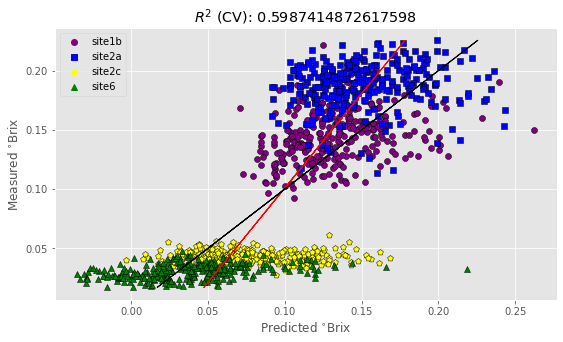

In [43]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 30)

x1_la_std = opt_Xc_la_std[0:300,:]
x2_la_std = opt_Xc_la_std[300:600,:]
x3_la_std = opt_Xc_la_std[600:900,:]
x4_la_std = opt_Xc_la_std[900:1191,:]

y1_la_std = y_la_std[0:300,:]
y2_la_std = y_la_std[300:600,:]
y3_la_std = y_la_std[600:900,:]
y4_la_std = y_la_std[900:1191,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

In [95]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=11)
pls.fit(x, y_la_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:251]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

0.04055055561990547: band_16
0.04671184187874768: band_17
0.015082203781834443: band_18
0.020149632779493887: band_19
0.004566741200183516: band_20
0.016001325800173147: band_21
-0.010742210776276021: band_22
-0.02052465118646975: band_23
-0.03057973513962698: band_24
-0.018147697886166863: band_25
-0.02925322653660086: band_26
0.0019362777112200543: band_27
0.027447880557138277: band_28
-0.034554621242635114: band_29
-0.021970678379922098: band_31
-0.03076591385924847: band_32
-0.00849416648338647: band_33
-0.025392366797552645: band_34
-0.014118617103024842: band_35
-0.0025454786909753584: band_36
0.026163879811586625: band_37
0.018781330553366817: band_38
0.013592455753493781: band_39
-0.00252038640160061: band_40
0.0318634224311051: band_41
0.012279199217053297: band_42
-0.010941600564876539: band_43
-0.015511462617342086: band_44
-0.027066393248196912: band_45
-0.011333462273344395: band_46
-0.014799971642097155: band_47
-0.013488159891133856: band_48
-0.0003467508696603394: band_

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# sla

In [44]:
sla_trait_pdf_ymax = np.load('E:/wenqu/numpy/sla_trait_pdf_ymax2.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load('E:/wenqu/numpy/sla_trait_pdf_std2.npy',  allow_pickle=True)

In [45]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [46]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:300, :]
site2a_y_sla_max1 = y_sla_max1[2410:2710, :]
site2c_y_sla_max1 = y_sla_max1[2925:3225,:]
site6_y_sla_max1_1 = y_sla_max1[3281:3393,:]
site6_y_sla_max1_2 = y_sla_max1[3394:3574,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1, site6_y_sla_max1_2))
# site2c_x = x[]
y_sla_max.shape

(1191, 2)

In [47]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:300, :]
site2a_y_sla_std1 = y_sla_std1[2410:2710, :]
site2c_y_sla_std1 = y_sla_std1[2925:3225,:]
site6_y_sla_std1_1 = y_sla_std1[3281:3393,:]
site6_y_sla_std1_2 = y_sla_std1[3394:3574,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1, site6_y_sla_std1_2))
# site2c_x = x[]
y_sla_std.shape

(1191, 2)

#### SLA max all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  272
Optimised MSEP  95.73301872386463



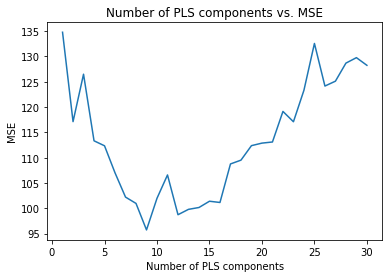

R2 calib: 0.433
R2 CV: 0.296
MSE calib: 76.957


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


MSE CV: 95.616
[35.23984922] [0.33236621]
None
0 site1b [51.71889512] [36.958891353044905 'site1b_sla_site1b_10_21.tif']
1 site1b [46.1740422] [51.853105846986566 'site1b_sla_site1b_10_24.tif']
2 site1b [52.87905622] [53.43284927819985 'site1b_sla_site1b_10_25.tif']
3 site1b [53.87083123] [51.55094053588691 'site1b_sla_site1b_10_26.tif']
4 site1b [49.94757351] [49.310931006262514 'site1b_sla_site1b_10_27.tif']
5 site1b [50.50128321] [35.657878436666245 'site1b_sla_site1b_10_28.tif']
6 site1b [38.61384575] [31.808340570196417 'site1b_sla_site1b_10_29.tif']
7 site1b [41.58679785] [36.12162822181466 'site1b_sla_site1b_10_30.tif']
8 site1b [51.69558074] [44.79986008105213 'site1b_sla_site1b_10_31.tif']
9 site1b [62.46247385] [53.08012457863413 'site1b_sla_site1b_10_35.tif']
10 site1b [56.05773113] [54.080423462342864 'site1b_sla_site1b_10_36.tif']
11 site1b [49.8697438] [39.08687847466324 'site1b_sla_site1b_11_27.tif']
12 site1b [41.27870808] [32.78363549539 'site1b_sla_site1b_11_28.tif']


484 site2a [43.30234812] [43.972915876526265 'site2a_sla_site2a_19_31.tif']
485 site2a [41.23467793] [43.03608042239974 'site2a_sla_site2a_19_32.tif']
486 site2a [54.46913569] [58.18164338355168 'site2a_sla_site2a_19_8.tif']
487 site2a [48.63737993] [43.59024670253296 'site2a_sla_site2a_19_9.tif']
488 site2a [56.5378172] [43.614003066946545 'site2a_sla_site2a_20_10.tif']
489 site2a [56.5378172] [42.96887075615341 'site2a_sla_site2a_20_11.tif']
490 site2a [54.85417416] [45.41012232676453 'site2a_sla_site2a_20_12.tif']
491 site2a [54.31913335] [45.13987568622106 'site2a_sla_site2a_20_13.tif']
492 site2a [56.40772924] [42.98846009949063 'site2a_sla_site2a_20_14.tif']
493 site2a [53.32007055] [46.15892544338813 'site2a_sla_site2a_20_15.tif']
494 site2a [54.67962075] [53.03740369405142 'site2a_sla_site2a_20_16.tif']
495 site2a [53.87540787] [52.408552653033695 'site2a_sla_site2a_20_17.tif']
496 site2a [52.35176425] [47.1187828691304 'site2a_sla_site2a_20_18.tif']
497 site2a [52.89569744] [5

1050 site6 [57.83330932] [83.3790623412147 'site6_sla_site6_42_20.tif']
1051 site6 [54.72610574] [56.71586113908456 'site6_sla_site6_42_21.tif']
1052 site6 [57.76084824] [50.074203498787256 'site6_sla_site6_42_22.tif']
1053 site6 [55.16790741] [67.3076369467489 'site6_sla_site6_42_23.tif']
1054 site6 [57.12745082] [46.1286934267248 'site6_sla_site6_42_24.tif']
1055 site6 [57.90845528] [55.32369213668728 'site6_sla_site6_42_25.tif']
1056 site6 [55.7760575] [70.81764286348233 'site6_sla_site6_43_16.tif']
1057 site6 [54.75694749] [71.70761699952256 'site6_sla_site6_43_17.tif']
1058 site6 [56.6192782] [74.66002763779298 'site6_sla_site6_43_18.tif']
1059 site6 [53.57128731] [78.40943910078043 'site6_sla_site6_43_19.tif']
1060 site6 [53.79195758] [67.66603304916222 'site6_sla_site6_43_20.tif']
1061 site6 [58.07030276] [56.76188252997983 'site6_sla_site6_43_21.tif']
1062 site6 [52.82063515] [57.31085634063197 'site6_sla_site6_43_22.tif']
1063 site6 [56.04827198] [48.55137079405732 'site6_sla_

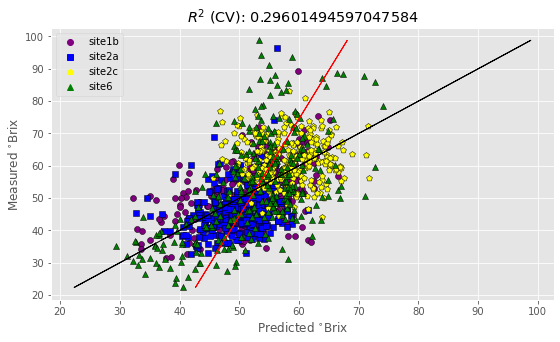

In [48]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 30)
x1_sla_max = opt_Xc_sla_max[0:300,:]
x2_sla_max = opt_Xc_sla_max[300:600,:]
x3_sla_max = opt_Xc_sla_max[600:900,:]
x4_sla_max = opt_Xc_sla_max[900:1191,:]

y1_sla_max = y_sla_max[0:300,:]
y2_sla_max = y_sla_max[300:600,:]
y3_sla_max = y_sla_max[600:900,:]
y4_sla_max = y_sla_max[900:1191,:]
file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [96]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=9)
pls.fit(x, y_sla_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:272]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

0.7366363211034467: band_16
4.085820833309396: band_17
-1.846664830654557: band_18
0.6727956687682575: band_19
2.304148540528768: band_33
5.0798171898301465: band_35
4.099834665170492: band_36
2.4535208956720096: band_37
-1.708947173167924: band_38
4.642164057028997: band_39
1.7562427225403763: band_59
0.6841841085334562: band_60
3.5530208009534716: band_61
2.549816799027241: band_62
0.5200130528667855: band_63
2.154754035377805: band_67
5.3243993592051195: band_68
-2.1919897699204554: band_69
-2.2103925481842093: band_70
-1.2843768793055819: band_71
-2.4166386373310784: band_72
0.4347601872557371: band_73
-2.692227366760496: band_74
-4.605257181961912: band_75
-2.3939812004982723: band_76
2.388968014692955: band_77
-0.06014184472990359: band_78
-2.1171041318612325: band_79
1.1321642318331948: band_80
-0.27366440365983874: band_81
-1.7083370595170821: band_82
0.07692920115641964: band_112
3.7728524787694457: band_145
-0.7999194917178507: band_148
8.15854883241356: band_150
-2.073591082

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


#### SLA std all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  244
Optimised MSEP  1.3828767414461424e-05



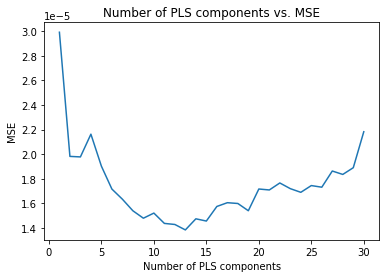

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.823
R2 CV: 0.756
MSE calib: 0.000
MSE CV: 0.000
[0.00529924] [0.76147158]
None
0 site1b [0.0283639] [0.03685259428562611 'site1b_sla_site1b_10_21.tif']
1 site1b [0.02855164] [0.02655755039343772 'site1b_sla_site1b_10_24.tif']
2 site1b [0.0260974] [0.025181249037662896 'site1b_sla_site1b_10_25.tif']
3 site1b [0.02793521] [0.025858011231920462 'site1b_sla_site1b_10_26.tif']
4 site1b [0.02704125] [0.02715941404582847 'site1b_sla_site1b_10_27.tif']
5 site1b [0.02739906] [0.03764360659189303 'site1b_sla_site1b_10_28.tif']
6 site1b [0.03261803] [0.04213431386555667 'site1b_sla_site1b_10_29.tif']
7 site1b [0.03065969] [0.03729980818301639 'site1b_sla_site1b_10_30.tif']
8 site1b [0.02551197] [0.03051380763282481 'site1b_sla_site1b_10_31.tif']
9 site1b [0.02315091] [0.025110244386376088 'site1b_sla_site1b_10_35.tif']
10 site1b [0.02402464] [0.024589718160249872 'site1b_sla_site1b_10_36.tif']
11 site1b [0.02960242] [0.034252298844818695 'site1b_sla_site1b_11_27.tif']
12 site1b [0.031

447 site2a [0.02454682] [0.02632843239832118 'site2a_sla_site2a_18_17.tif']
448 site2a [0.02644021] [0.028658789737182024 'site2a_sla_site2a_18_18.tif']
449 site2a [0.02389599] [0.02702920823515514 'site2a_sla_site2a_18_19.tif']
450 site2a [0.02645032] [0.027730494442022285 'site2a_sla_site2a_18_20.tif']
451 site2a [0.02601911] [0.0285030386007389 'site2a_sla_site2a_18_21.tif']
452 site2a [0.02584994] [0.025930127179363886 'site2a_sla_site2a_18_22.tif']
453 site2a [0.02558567] [0.029268849093713942 'site2a_sla_site2a_18_23.tif']
454 site2a [0.02486567] [0.035343179194597986 'site2a_sla_site2a_18_24.tif']
455 site2a [0.02518958] [0.03302105248637441 'site2a_sla_site2a_18_25.tif']
456 site2a [0.02825848] [0.03526975662329842 'site2a_sla_site2a_18_26.tif']
457 site2a [0.03051687] [0.03128736346880029 'site2a_sla_site2a_18_27.tif']
458 site2a [0.0270853] [0.030107292663716544 'site2a_sla_site2a_18_28.tif']
459 site2a [0.02969324] [0.02247810916132714 'site2a_sla_site2a_18_29.tif']
460 site

997 site6 [0.01098518] [0.010090818622179051 'site6_sla_site6_32_28.tif']
998 site6 [0.01357871] [0.010305088378783725 'site6_sla_site6_32_29.tif']
999 site6 [0.01019345] [0.00926945541619121 'site6_sla_site6_32_30.tif']
1000 site6 [0.01038682] [0.010694834647326412 'site6_sla_site6_33_26.tif']
1001 site6 [0.01071129] [0.008188585898604953 'site6_sla_site6_33_27.tif']
1002 site6 [0.01195753] [0.010340484823380276 'site6_sla_site6_33_28.tif']
1003 site6 [0.01290107] [0.011789622002820225 'site6_sla_site6_33_29.tif']
1004 site6 [0.0082427] [0.007703763992807732 'site6_sla_site6_34_25.tif']
1005 site6 [0.01298462] [0.009388312510350074 'site6_sla_site6_34_26.tif']
1006 site6 [0.01235784] [0.009246292540881435 'site6_sla_site6_34_27.tif']
1007 site6 [0.01059745] [0.009543371122683606 'site6_sla_site6_34_28.tif']
1008 site6 [0.01522846] [0.012984587545469549 'site6_sla_site6_35_24.tif']
1009 site6 [0.01522846] [0.008012094100860907 'site6_sla_site6_35_25.tif']
1010 site6 [0.00828652] [0.009

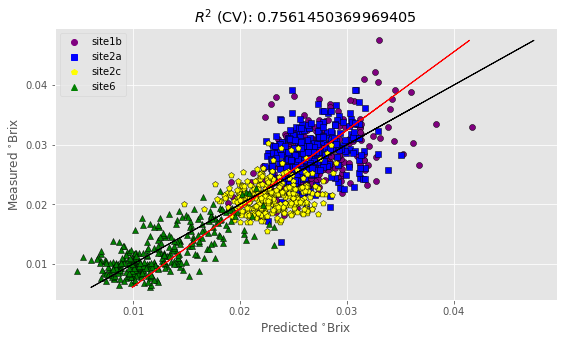

In [49]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 30)

x1_sla_std = opt_Xc_sla_std[0:300,:]
x2_sla_std = opt_Xc_sla_std[300:600,:]
x3_sla_std = opt_Xc_sla_std[600:900,:]
x4_sla_std = opt_Xc_sla_std[900:1191,:]

y1_sla_std = y_sla_std[0:300,:]
y2_sla_std = y_sla_std[300:600,:]
y3_sla_std = y_sla_std[600:900,:]
y4_sla_std = y_sla_std[900:1191,:]
file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

In [97]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=13)
pls.fit(x, y_sla_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:244]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

0.001317976217960812: band_16
-0.001240679350882454: band_17
0.0009336319491249416: band_18
0.0005824755231649086: band_19
0.0010967928291830222: band_20
0.0001992840518106125: band_21
0.001191718733980677: band_22
-0.002180679393825018: band_23
-0.0017424544308676311: band_24
-0.0036689200240893702: band_25
0.003295008868545849: band_28
-0.002345048382226286: band_31
-0.0013416422226903396: band_32
-4.119764077303827e-05: band_33
-0.002865115486910488: band_34
-0.001699216850552488: band_35
0.0005778868075527429: band_36
0.002255388352825813: band_37
0.0026226946649352922: band_38
-0.002388248849215175: band_39
-0.0015387004549918205: band_40
0.002196360001253144: band_41
0.0005391385245338142: band_42
-0.0017977376840344554: band_43
-0.002008321186005843: band_44
-0.001518266453104143: band_45
-0.0004655054214835567: band_55
0.00033063137617673127: band_56
0.0005397732629904452: band_57
8.452906173818826e-06: band_58
-0.003505133948583258: band_59
-0.001967900201797666: band_60
0.000

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# ldmc

In [50]:
ldmc_trait_pdf_ymax = np.load('E:/wenqu/numpy/ldmc_trait_pdf_ymax2.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load('E:/wenqu/numpy/ldmc_trait_pdf_std2.npy',  allow_pickle=True)

In [51]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [52]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:300, :]
site2a_y_ldmc_max1 = y_ldmc_max1[2410:2710, :]
site2c_y_ldmc_max1 = y_ldmc_max1[2925:3225,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[3281:3393,:]
site6_y_ldmc_max1_2 = y_ldmc_max1[3394:3574,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1, site6_y_ldmc_max1_2))
# site2c_x = x[]
y_ldmc_max.shape

(1191, 2)

In [53]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:300, :]
site2a_y_ldmc_std1 = y_ldmc_std1[2410:2710, :]
site2c_y_ldmc_std1 = y_ldmc_std1[2925:3225,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[3281:3393,:]
site6_y_ldmc_std1_2 = y_ldmc_std1[3394:3574,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1, site6_y_ldmc_std1_2))
# site2c_x = x[]
y_ldmc_std.shape

(1191, 2)

#### LDMC max all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  251
Optimised MSEP  16.802771488194896



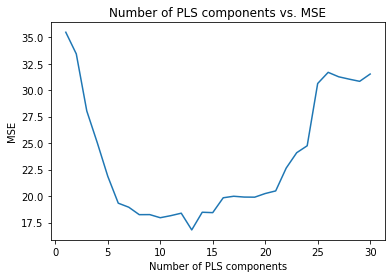

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.677
R2 CV: 0.556
MSE calib: 12.047
MSE CV: 16.558
[7.77810959] [0.62066745]
None
0 site1b [30.12538458] [19.242610256847886 'site1b_ldmc_site1b_10_21.tif']
1 site1b [30.9371109] [34.17947646232253 'site1b_ldmc_site1b_10_24.tif']
2 site1b [28.52262142] [30.011368102678535 'site1b_ldmc_site1b_10_25.tif']
3 site1b [28.65117464] [28.573514714975456 'site1b_ldmc_site1b_10_26.tif']
4 site1b [29.23494667] [29.666965989901698 'site1b_ldmc_site1b_10_27.tif']
5 site1b [31.15178699] [22.95640720366283 'site1b_ldmc_site1b_10_28.tif']
6 site1b [26.03643885] [17.888642555331792 'site1b_ldmc_site1b_10_29.tif']
7 site1b [24.21288127] [18.074369260356615 'site1b_ldmc_site1b_10_30.tif']
8 site1b [28.72274467] [25.182608232207794 'site1b_ldmc_site1b_10_31.tif']
9 site1b [36.46847853] [30.931333789056012 'site1b_ldmc_site1b_10_35.tif']
10 site1b [33.21550648] [29.63705081955645 'site1b_ldmc_site1b_10_36.tif']
11 site1b [29.84678015] [24.53412683993528 'site1b_ldmc_site1b_11_27.tif']
12 site1b 

486 site2a [18.88898946] [17.073556756861798 'site2a_ldmc_site2a_19_8.tif']
487 site2a [16.72893555] [15.243144028819286 'site2a_ldmc_site2a_19_9.tif']
488 site2a [17.83128544] [16.993952506623657 'site2a_ldmc_site2a_20_10.tif']
489 site2a [17.83128544] [14.57732260347821 'site2a_ldmc_site2a_20_11.tif']
490 site2a [17.20115274] [14.908368934830358 'site2a_ldmc_site2a_20_12.tif']
491 site2a [17.49512103] [16.010901293861995 'site2a_ldmc_site2a_20_13.tif']
492 site2a [18.11826187] [15.22202202026091 'site2a_ldmc_site2a_20_14.tif']
493 site2a [16.5229322] [16.070677659648354 'site2a_ldmc_site2a_20_15.tif']
494 site2a [16.12360602] [16.45400577804891 'site2a_ldmc_site2a_20_16.tif']
495 site2a [16.19724874] [16.099824985077284 'site2a_ldmc_site2a_20_17.tif']
496 site2a [16.25990683] [14.689550513442889 'site2a_ldmc_site2a_20_18.tif']
497 site2a [17.03200763] [15.158171534997377 'site2a_ldmc_site2a_20_19.tif']
498 site2a [17.15093088] [13.973307476273105 'site2a_ldmc_site2a_20_20.tif']
499 s

1022 site6 [14.885791] [26.585266013330664 'site6_ldmc_site6_38_21.tif']
1023 site6 [14.83288254] [34.6797576809823 'site6_ldmc_site6_38_22.tif']
1024 site6 [15.53190807] [18.164950568716595 'site6_ldmc_site6_38_23.tif']
1025 site6 [14.88639188] [16.502089860493715 'site6_ldmc_site6_38_24.tif']
1026 site6 [14.55089696] [15.815475306207626 'site6_ldmc_site6_38_25.tif']
1027 site6 [16.0544791] [17.973435398649666 'site6_ldmc_site6_39_20.tif']
1028 site6 [15.36786742] [34.57365003118387 'site6_ldmc_site6_39_21.tif']
1029 site6 [17.52413775] [39.49812466249834 'site6_ldmc_site6_39_22.tif']
1030 site6 [17.36052372] [27.08086122068488 'site6_ldmc_site6_39_23.tif']
1031 site6 [19.1548803] [17.45780846816671 'site6_ldmc_site6_39_24.tif']
1032 site6 [16.94882247] [11.189896541801764 'site6_ldmc_site6_3_52.tif']
1033 site6 [16.62064191] [12.569930030561071 'site6_ldmc_site6_3_53.tif']
1034 site6 [16.80808233] [17.954728623181293 'site6_ldmc_site6_3_54.tif']
1035 site6 [15.45559462] [12.232665434

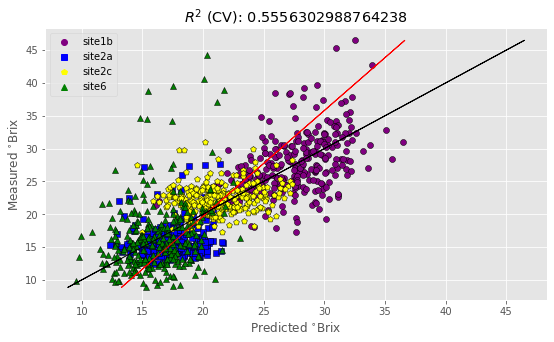

In [54]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 30)
x1_ldmc_max = opt_Xc_ldmc_max[0:300,:]
x2_ldmc_max = opt_Xc_ldmc_max[300:600,:]
x3_ldmc_max = opt_Xc_ldmc_max[600:900,:]
x4_ldmc_max = opt_Xc_ldmc_max[900:1191,:]

y1_ldmc_max = y_ldmc_max[0:300,:]
y2_ldmc_max = y_ldmc_max[300:600,:]
y3_ldmc_max = y_ldmc_max[600:900,:]
y4_ldmc_max = y_ldmc_max[900:1191,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [98]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=13)
pls.fit(x, y_ldmc_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:251]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

3.503274126241846: band_16
3.6938577771976555: band_17
0.4072679491598795: band_18
0.2978689844598928: band_19
-1.2877903521276581: band_20
-1.274797765683722: band_21
-0.6788627052316172: band_22
-0.9659067248620185: band_23
-0.7456894649704879: band_24
1.9312764316916975: band_25
0.0028708739347582737: band_31
-0.5103686289715457: band_32
-2.133563289448743: band_33
1.2223022297007888: band_34
5.234502025631164: band_35
0.06969226124828112: band_36
3.725241005582442: band_37
-1.619592368934307: band_38
1.930777220975359: band_39
-1.050307943573976: band_40
2.432241789454723: band_41
2.305569759553341: band_59
-0.49057151602278026: band_60
4.443042266037112: band_61
-0.41383317032188455: band_62
3.8067511438837562: band_64
-0.35944872531444777: band_65
-0.2037029850640559: band_66
1.1175366887212022: band_67
4.901289357572312: band_68
0.9409624904357002: band_69
-3.7932813680171678: band_70
2.4314759507736765: band_71
-3.37862732201102: band_72
2.4440688621090034: band_73
-0.499467121

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


#### LDMC std all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  250
Optimised MSEP  8.326360286646768e-05



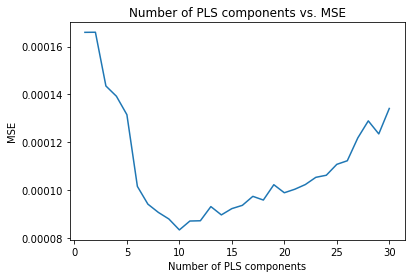

R2 calib: 0.788
R2 CV: 0.700


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


MSE calib: 0.000
MSE CV: 0.000
[0.01763007] [0.70541411]
None
0 site1b [0.0506236] [0.07207639840080597 'site1b_ldmc_site1b_10_21.tif']
1 site1b [0.0508408] [0.04120181084045294 'site1b_ldmc_site1b_10_24.tif']
2 site1b [0.0433955] [0.04467208594394953 'site1b_ldmc_site1b_10_25.tif']
3 site1b [0.04454143] [0.04729584048564163 'site1b_ldmc_site1b_10_26.tif']
4 site1b [0.04687015] [0.046093942275022774 'site1b_ldmc_site1b_10_27.tif']
5 site1b [0.04552663] [0.05903799256322918 'site1b_ldmc_site1b_10_28.tif']
6 site1b [0.06055028] [0.07490434285322635 'site1b_ldmc_site1b_10_29.tif']
7 site1b [0.05437416] [0.07443862879807804 'site1b_ldmc_site1b_10_30.tif']
8 site1b [0.04580488] [0.05508383744804756 'site1b_ldmc_site1b_10_31.tif']
9 site1b [0.03770562] [0.04439738242827522 'site1b_ldmc_site1b_10_35.tif']
10 site1b [0.04335881] [0.045072391600446536 'site1b_ldmc_site1b_10_36.tif']
11 site1b [0.05025556] [0.05515834273560408 'site1b_ldmc_site1b_11_27.tif']
12 site1b [0.05664012] [0.07707308100

452 site2a [0.08066997] [0.08449689326063686 'site2a_ldmc_site2a_18_22.tif']
453 site2a [0.08511153] [0.09704794108315719 'site2a_ldmc_site2a_18_23.tif']
454 site2a [0.07915297] [0.10264627024292201 'site2a_ldmc_site2a_18_24.tif']
455 site2a [0.07511951] [0.08447432648674535 'site2a_ldmc_site2a_18_25.tif']
456 site2a [0.07723348] [0.08857371374497962 'site2a_ldmc_site2a_18_26.tif']
457 site2a [0.07799855] [0.09019050746289271 'site2a_ldmc_site2a_18_27.tif']
458 site2a [0.07361803] [0.07224522830722355 'site2a_ldmc_site2a_18_28.tif']
459 site2a [0.07710917] [0.07296198958635647 'site2a_ldmc_site2a_18_29.tif']
460 site2a [0.08363413] [0.07519725569123686 'site2a_ldmc_site2a_18_30.tif']
461 site2a [0.08700425] [0.09019749045410116 'site2a_ldmc_site2a_18_31.tif']
462 site2a [0.08140442] [0.08456680463938773 'site2a_ldmc_site2a_18_32.tif']
463 site2a [0.07723981] [0.07760801459213229 'site2a_ldmc_site2a_18_9.tif']
464 site2a [0.07564656] [0.08297259979231338 'site2a_ldmc_site2a_19_10.tif']


976 site6 [0.04243393] [0.04145479683889602 'site6_ldmc_site6_27_32.tif']
977 site6 [0.04226389] [0.038143265081104966 'site6_ldmc_site6_27_33.tif']
978 site6 [0.03391748] [0.038892882161202055 'site6_ldmc_site6_27_34.tif']
979 site6 [0.03769543] [0.04009062028458203 'site6_ldmc_site6_28_31.tif']
980 site6 [0.03411972] [0.04440596131503328 'site6_ldmc_site6_28_32.tif']
981 site6 [0.03045038] [0.04141460236816911 'site6_ldmc_site6_28_33.tif']
982 site6 [0.03408914] [0.0389529078951037 'site6_ldmc_site6_28_34.tif']
983 site6 [0.05035406] [0.040773916178985056 'site6_ldmc_site6_29_30.tif']
984 site6 [0.0516231] [0.04401547676338025 'site6_ldmc_site6_29_31.tif']
985 site6 [0.05264049] [0.04408401427039404 'site6_ldmc_site6_29_32.tif']
986 site6 [0.04787614] [0.0455804540067919 'site6_ldmc_site6_2_53.tif']
987 site6 [0.04787614] [0.042616134708627566 'site6_ldmc_site6_2_54.tif']
988 site6 [0.04519249] [0.04337740604939599 'site6_ldmc_site6_30_29.tif']
989 site6 [0.04539479] [0.0338819515625

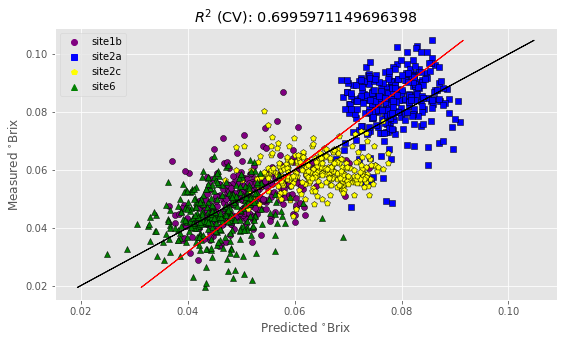

In [55]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 30)

x1_ldmc_std = opt_Xc_ldmc_std[0:300,:]
x2_ldmc_std = opt_Xc_ldmc_std[300:600,:]
x3_ldmc_std = opt_Xc_ldmc_std[600:900,:]
x4_ldmc_std = opt_Xc_ldmc_std[900:1191,:]

y1_ldmc_std = y_ldmc_std[0:300,:]
y2_ldmc_std = y_ldmc_std[300:600,:]
y3_ldmc_std = y_ldmc_std[600:900,:]
y4_ldmc_std = y_ldmc_std[900:1191,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

In [99]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=10)
pls.fit(x, y_ldmc_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:250]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

0.0008726414573811225: band_16
0.0008570121482638096: band_20
-0.0005607399336281297: band_31
-0.004594790183589961: band_32
-0.0015564640228466564: band_33
-0.004432826436718918: band_34
-0.009067158119257826: band_35
-0.0020812901288686653: band_36
0.00014306884161406492: band_37
0.002363482400595403: band_38
-0.0009510773544693432: band_39
-0.0008061591070006401: band_40
0.0010180916658664343: band_41
0.0033365488176355404: band_42
-0.0011083085042187832: band_43
0.0011111303422833246: band_52
0.004189627376812209: band_53
0.0020009555200782695: band_54
0.0016780026489546232: band_55
3.093257235352213e-05: band_56
-0.001762094256651021: band_57
0.001230019684374701: band_58
-0.007748518202460102: band_59
-0.0007612172258462063: band_60
-0.0038760314109252685: band_61
-0.0004451448121115882: band_62
0.0009839488336166027: band_63
-0.0009273289023836275: band_64
0.0026872234984790665: band_65
0.006189736592201471: band_66
0.002066742352216876: band_67
-0.004025486293197296: band_68
-0

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


# pc

# pn

In [56]:
pn_trait_pdf_ymax = np.load('E:/wenqu/numpy/pn_trait_pdf_ymax2.npy',  allow_pickle=True)
pn_trait_pdf_std = np.load('E:/wenqu/numpy/pn_trait_pdf_std2.npy',  allow_pickle=True)

In [57]:

y_pn_max1 = np.array(pn_trait_pdf_ymax)

y_pn_std1 = np.array(pn_trait_pdf_std)

In [58]:
site1b_y_pn_max1 = y_pn_max1[0:300, :]
site2a_y_pn_max1 = y_pn_max1[2410:2710, :]
site2c_y_pn_max1 = y_pn_max1[2925:3225,:]
site6_y_pn_max1_1 = y_pn_max1[3281:3393,:]
site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1, site6_y_pn_max1_2))
# site2c_x = x[]
y_pn_max.shape

(1191, 2)

In [59]:
site1b_y_pn_std1 = y_pn_std1[0:300, :]
site2a_y_pn_std1 = y_pn_std1[2410:2710, :]
site2c_y_pn_std1 = y_pn_std1[2925:3225,:]
site6_y_pn_std1_1 = y_pn_std1[3281:3393,:]
site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1, site6_y_pn_std1_2))
# site2c_x = x[]
y_pn_std.shape

(1191, 2)

#### PN max all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  230
Optimised MSEP  165.21483767572101



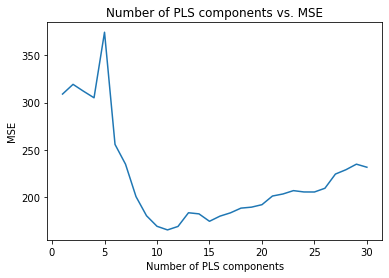

R2 calib: 0.653
R2 CV: 0.403
MSE calib: 96.199
MSE CV: 165.518


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[23.86643753] [0.44924109]
None
0 site1b [38.74875496] [39.463575233090744 'site1b_pn_site1b_10_21.tif']
1 site1b [43.47114882] [39.7568333638695 'site1b_pn_site1b_10_24.tif']
2 site1b [38.31782862] [49.914797159972984 'site1b_pn_site1b_10_25.tif']
3 site1b [44.48636094] [43.998000111908546 'site1b_pn_site1b_10_26.tif']
4 site1b [37.14847528] [45.36120294424808 'site1b_pn_site1b_10_27.tif']
5 site1b [34.86095473] [33.209087374341074 'site1b_pn_site1b_10_28.tif']
6 site1b [45.38353314] [39.61184259942257 'site1b_pn_site1b_10_29.tif']
7 site1b [43.75394073] [57.427468264564695 'site1b_pn_site1b_10_30.tif']
8 site1b [37.70988905] [39.60583145796734 'site1b_pn_site1b_10_31.tif']
9 site1b [24.75124565] [50.173043269893576 'site1b_pn_site1b_10_35.tif']
10 site1b [29.77944357] [44.50678275402762 'site1b_pn_site1b_10_36.tif']
11 site1b [47.97914165] [39.070546568716956 'site1b_pn_site1b_11_27.tif']
12 site1b [44.19897681] [51.26232725049432 'site1b_pn_site1b_11_28.tif']
13 site1b [44.75085669]

526 site2a [57.71496729] [77.7041857364371 'site2a_pn_site2a_21_23.tif']
527 site2a [59.53411961] [67.8982015261036 'site2a_pn_site2a_21_24.tif']
528 site2a [57.49122491] [67.3245741257858 'site2a_pn_site2a_21_25.tif']
529 site2a [54.9620591] [79.06905731320437 'site2a_pn_site2a_21_26.tif']
530 site2a [50.1679552] [72.46702369342992 'site2a_pn_site2a_21_27.tif']
531 site2a [58.20219264] [80.79461243275726 'site2a_pn_site2a_21_28.tif']
532 site2a [50.29800579] [69.19860157175522 'site2a_pn_site2a_21_29.tif']
533 site2a [62.71704883] [73.7855921747583 'site2a_pn_site2a_21_30.tif']
534 site2a [62.95002844] [65.24297989531081 'site2a_pn_site2a_21_32.tif']
535 site2a [58.90589314] [72.5443528476499 'site2a_pn_site2a_21_33.tif']
536 site2a [66.75402934] [62.5699924730098 'site2a_pn_site2a_21_8.tif']
537 site2a [70.16688882] [59.392979732122036 'site2a_pn_site2a_21_9.tif']
538 site2a [51.23921795] [67.54094353641409 'site2a_pn_site2a_22_10.tif']
539 site2a [47.14776554] [74.87126055514143 'si

1042 site6 [39.55428436] [40.939927479841565 'site6_pn_site6_41_20.tif']
1043 site6 [41.34597979] [39.47973010100058 'site6_pn_site6_41_21.tif']
1044 site6 [23.94054844] [41.84695996795624 'site6_pn_site6_41_22.tif']
1045 site6 [30.40508523] [37.90724650218511 'site6_pn_site6_41_23.tif']
1046 site6 [34.18837515] [37.37660446793599 'site6_pn_site6_41_24.tif']
1047 site6 [29.97584522] [40.868809264776644 'site6_pn_site6_41_25.tif']
1048 site6 [31.24312075] [34.953093121777606 'site6_pn_site6_42_18.tif']
1049 site6 [24.57967941] [41.51024374994086 'site6_pn_site6_42_19.tif']
1050 site6 [19.85382288] [41.189770848543496 'site6_pn_site6_42_20.tif']
1051 site6 [33.45300217] [37.35407525928146 'site6_pn_site6_42_21.tif']
1052 site6 [21.13070452] [28.125761090847355 'site6_pn_site6_42_22.tif']
1053 site6 [24.65909014] [40.29437042739729 'site6_pn_site6_42_23.tif']
1054 site6 [27.86298682] [35.65656504978815 'site6_pn_site6_42_24.tif']
1055 site6 [26.01861749] [37.96252038001832 'site6_pn_site6

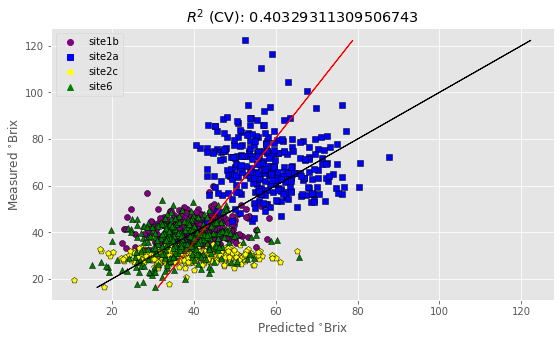

In [60]:
opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 30)
x1_pn_max = opt_Xc_pn_max[0:300,:]
x2_pn_max = opt_Xc_pn_max[300:600,:]
x3_pn_max = opt_Xc_pn_max[600:900,:]
x4_pn_max = opt_Xc_pn_max[900:1191,:]

y1_pn_max = y_pn_max[0:300,:]
y2_pn_max = y_pn_max[300:600,:]
y3_pn_max = y_pn_max[600:900,:]
y4_pn_max = y_pn_max[900:1191,:]
file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max.csv'
simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
                             y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
                             ncomp_pn_max, labels, file_name_pn_max)

In [100]:
# Fit PLS model with desired number of components
pls = PLSRegression(n_components=11)
pls.fit(x, y_pn_max[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:230]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

3.511266468923754: band_16
14.091736289291351: band_17
2.398046578653358: band_18
-0.09443130219835959: band_19
0.03689667911175168: band_20
6.534675117618586: band_21
-4.301864936164516: band_22
-5.5278481041955: band_23
-8.09223026625276: band_24
-3.2882637120600022: band_25
-5.490846003809111: band_26
0.38864925755331714: band_27
8.132499144872762: band_28
-7.485285153732786: band_29
-15.213626336855913: band_30
-6.928866421390505: band_31
-6.539756277330514: band_32
3.282252314214066: band_33
-3.0798430777420376: band_34
-4.898804035190467: band_35
-7.680733253925412: band_36
6.40303743156691: band_37
5.345108101093897: band_38
1.7786325520481727: band_39
0.5423218971321819: band_40
6.574422611845749: band_41
3.992549332696831: band_42
-0.1076630730278958: band_43
1.3597317642614852: band_44
-6.118392284136739: band_45
-0.5407431804260775: band_46
-4.800761043928145: band_47
-1.8500960333405603: band_48
0.5838421591415114: band_49
1.682143536249409: band_50
0.36300595873291: band_5

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


#### PN std all sites

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(1191, 319)
3% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(1191, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  258
Optimised MSEP  4.757171316751711e-05



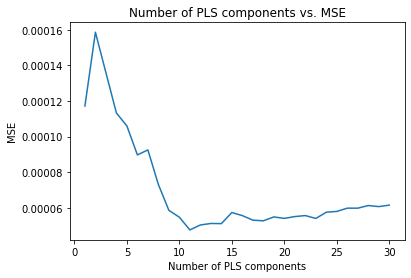

R2 calib: 0.696
R2 CV: 0.494
MSE calib: 0.000
MSE CV: 0.000


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[0.01441264] [0.54621012]
None
0 site1b [0.03229386] [0.03593809750466064 'site1b_pn_site1b_10_21.tif']
1 site1b [0.0308068] [0.034574033538586284 'site1b_pn_site1b_10_24.tif']
2 site1b [0.03358112] [0.02703564472989632 'site1b_pn_site1b_10_25.tif']
3 site1b [0.02903084] [0.03048696367096392 'site1b_pn_site1b_10_26.tif']
4 site1b [0.03465584] [0.029563163972028593 'site1b_pn_site1b_10_27.tif']
5 site1b [0.03561756] [0.04056711831860466 'site1b_pn_site1b_10_28.tif']
6 site1b [0.03170013] [0.03503437275574358 'site1b_pn_site1b_10_29.tif']
7 site1b [0.02935196] [0.02469338822513306 'site1b_pn_site1b_10_30.tif']
8 site1b [0.0328017] [0.03387787328689067 'site1b_pn_site1b_10_31.tif']
9 site1b [0.04075592] [0.02672619148246006 'site1b_pn_site1b_10_35.tif']
10 site1b [0.0358669] [0.030008719716063528 'site1b_pn_site1b_10_36.tif']
11 site1b [0.03054714] [0.03448325502591631 'site1b_pn_site1b_11_27.tif']
12 site1b [0.03264469] [0.027166427429161498 'site1b_pn_site1b_11_28.tif']
13 site1b [0.027

493 site2a [0.02677365] [0.019945343316383656 'site2a_pn_site2a_20_15.tif']
494 site2a [0.02851229] [0.01869288057194806 'site2a_pn_site2a_20_16.tif']
495 site2a [0.02832498] [0.017984878378213505 'site2a_pn_site2a_20_17.tif']
496 site2a [0.02620688] [0.018732229506573623 'site2a_pn_site2a_20_18.tif']
497 site2a [0.02695337] [0.01936561581005802 'site2a_pn_site2a_20_19.tif']
498 site2a [0.02741986] [0.0292030984532586 'site2a_pn_site2a_20_20.tif']
499 site2a [0.02690766] [0.020561796454565275 'site2a_pn_site2a_20_21.tif']
500 site2a [0.02849853] [0.02502081386843965 'site2a_pn_site2a_20_22.tif']
501 site2a [0.02343306] [0.022725159668104417 'site2a_pn_site2a_20_23.tif']
502 site2a [0.02495788] [0.025982345599544827 'site2a_pn_site2a_20_24.tif']
503 site2a [0.02413257] [0.023827033525162387 'site2a_pn_site2a_20_25.tif']
504 site2a [0.02536656] [0.01951252277313007 'site2a_pn_site2a_20_26.tif']
505 site2a [0.02486149] [0.018193347463940482 'site2a_pn_site2a_20_27.tif']
506 site2a [0.0273

1061 site6 [0.02552548] [0.022609602532699054 'site6_pn_site6_43_21.tif']
1062 site6 [0.02467543] [0.023151039455864095 'site6_pn_site6_43_22.tif']
1063 site6 [0.02511118] [0.023613148600686203 'site6_pn_site6_43_23.tif']
1064 site6 [0.01939009] [0.025140918342864117 'site6_pn_site6_43_24.tif']
1065 site6 [0.02104753] [0.02353867285782987 'site6_pn_site6_44_16.tif']
1066 site6 [0.02430913] [0.020826249759279894 'site6_pn_site6_44_17.tif']
1067 site6 [0.02515217] [0.020946898336034338 'site6_pn_site6_44_18.tif']
1068 site6 [0.01929702] [0.021185372231121415 'site6_pn_site6_44_19.tif']
1069 site6 [0.01929137] [0.021318325419071672 'site6_pn_site6_44_20.tif']
1070 site6 [0.02049476] [0.02261342619121438 'site6_pn_site6_44_21.tif']
1071 site6 [0.02393242] [0.021405027067665297 'site6_pn_site6_44_22.tif']
1072 site6 [0.01790628] [0.02425643985758724 'site6_pn_site6_44_23.tif']
1073 site6 [0.02741793] [0.020218671228124905 'site6_pn_site6_45_15.tif']
1074 site6 [0.0185915] [0.021171749574415

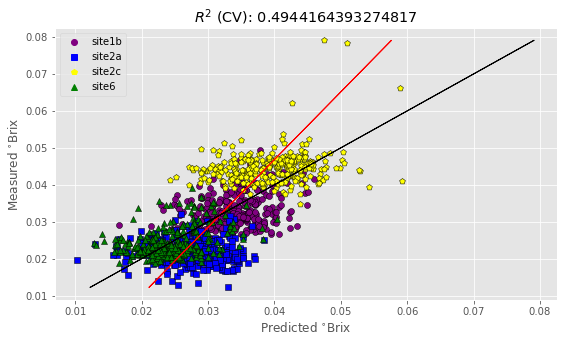

In [61]:
opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 30)

x1_pn_std = opt_Xc_pn_std[0:300,:]
x2_pn_std = opt_Xc_pn_std[300:600,:]
x3_pn_std = opt_Xc_pn_std[600:900,:]
x4_pn_std = opt_Xc_pn_std[900:1191,:]

y1_pn_std = y_pn_std[0:300,:]
y2_pn_std = y_pn_std[300:600,:]
y3_pn_std = y_pn_std[600:900,:]
y4_pn_std = y_pn_std[900:1191,:]
file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std.csv'
simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
                             y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
                             ncomp_pn_std, labels, file_name_pn_std)

In [101]:
pls = PLSRegression(n_components=11)
pls.fit(x, y_pn_std[:, 0].astype(np.float64))

# Get the absolute loadings of the first component (you can also consider other components or aggregate over all components)
aggregate_loadings = np.sum(np.abs(pls.x_loadings_), axis=1)

# Determine the indices of the wavelengths with smallest absolute loadings. For example, the bottom 10%.
discard_indices = np.argsort(aggregate_loadings)[:258]

# Determine the bands to keep
bands_to_keep = [band for index, band in enumerate(band_name) if index not in discard_indices]

# Fetch the coefficients for the bands to keep
coefficients_to_keep = [pls.coef_[index][0] for index in range(len(band_name)) if index not in discard_indices]

# Associate kept bands with their coefficients
kept_band_coefficients = dict(zip(bands_to_keep, coefficients_to_keep))

# Print the coefficients for the kept bands
for band, coef in kept_band_coefficients.items():
    print(f"{coef}: {band}")

-0.003234472690920474: band_16
-0.007190690718226215: band_17
-0.00023424225533495846: band_18
0.0008954370927620992: band_19
-0.0006340679875275723: band_20
-0.0044773971179983925: band_21
0.0013276525961504904: band_22
0.0007834139235000938: band_23
0.003820296219083003: band_24
0.001613329493321658: band_25
0.0029401520636974225: band_26
0.00017713131186550819: band_27
0.00479907096749015: band_32
-0.0030393865262203826: band_33
0.001134753616205888: band_34
0.0030029770005140844: band_35
0.0032956372601041007: band_36
-0.0017321806944477164: band_37
-0.0016807247938085508: band_38
-0.0014764048105839036: band_39
0.0020716984419045254: band_40
-0.002997593172324612: band_41
-0.002725368212584024: band_42
0.0001983237140787546: band_44
0.0017118692965100793: band_45
-0.0017821066177431649: band_46
0.0010293447278632612: band_48
-0.00010738566553058517: band_49
-0.0006475759456875688: band_50
-0.0009266998655020962: band_51
0.0001890492738752678: band_52
-0.004895872409014032: band_53

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
